# **Predictive Modeling on Country-Level Indicators Using Machine Learning**



**Author**: [Your Name]  
**Course**: [Course Title]  
**Date**: [Submission Date]




## Introduction

This notebook uses World Bank data to classify countries based on infant mortality rates.  The classification takes into account primary school enrollment, health expenditure, and GDP per capita.  The purpose is to investigate how well each model identifies patterns in socioeconomic indices related to infant mortality, hence providing insights into country-level development and well-being.

This notebook demonstrates the practical use of a custom machine learning package containing three models:
- Logistic Regression
- K-Nearest Neighbors
- Random Forest

It uses real data from the World Bank to classify countries based on infant mortality rates.

##  Install and Import Required Packages



In [3]:
!pip install wbgapi scikit-learn matplotlib seaborn pandas


In [1]:
import wbgapi as wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from ml_package.ml_models import CustomLogisticRegression, CustomKNNClassifier, CustomRandomForestClassifier


## Load and Prepare Data

The data used in this notebook is sourced from the **World Bank**, a global agency that provides significant economic and development data to countries around the world.  
 We have chosen crucial metrics such as **GDP per capita**, **health expenditure**, **school enrollment**, and **infant mortality rate**.  
 These indicators assist us in understanding and comparing the **socioeconomic conditions** of various countries for our classification work.


In [2]:
# Fetch data
indicators = {
    'SE.PRM.ENRR': 'Primary School Enrollment (%)',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'NY.GDP.PCAP.CD': 'GDP per Capita'
}

df = wb.data.DataFrame(indicators, time=2020, labels=True).reset_index()
df = wb.data.DataFrame(indicators, time=2020, labels=True).reset_index()
df = df[['economy', *indicators.keys()]].dropna()
df = df.rename(columns=indicators)
df.head()



C:\Users\Harry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']
C:\Users\Harry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


,economy,Primary School Enrollment (%),Health Expenditure (% of GDP),Infant Mortality Rate,GDP per Capita
0,ZWE,97.384162,2.954401,36.4,1730.413489
1,ZMB,94.777797,6.316198,40.9,951.644317
5,VNM,119.024054,4.300619,16.7,3534.039535
7,VUT,115.437370,3.994824,16.4,3042.987116
8,UZB,98.615311,6.750000,13.2,1978.280519


## Correlation Analysis

**Correlation analysis** enables us to understand the link between various features in our dataset.  
 It indicates whether features move jointly (positively or negatively) or independently.  
 This is significant for our classification problem because strongly correlated variables may be repetitive, whereas uncorrelated features frequently provide unique, meaningful information to the models.




In [3]:
import numpy as np

# Calculate the correlation matrix using NumPy
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()



NameError: name 'X_train' is not defined

### What The Heatmap Image Shows;

 This heatmap illustrates how the features in our dataset are related to one another.  The numbers in the boxes represent the correlation values:

 1.00 indicates that the feature is perfectly associated with itself (always true).

 0.00 indicates no link between the features.

 0.56 indicates a moderately favorable association, meaning that when one increases, so does the other.

 In this case:

 Feature 1 and Feature 2 have a moderate correlation (0.56).

 The other characteristics are not closely related to one another.


### Why Does This Matter for Our Machine Learning Models?

 These features are used to train machine learning models that predict a target class (e.g., nation category, income group).

 Most traits are not significantly connected, thus each one provides distinct information.

 This benefits our models, particularly Logistic Regression, which performs best when characteristics aren't too similar.

 It also helps models like KNN and Random Forest minimize signal duplication.

 In short, the features appear to be suitable for training.  There's no need to remove or mix any of them!

## Feature Scaling

A binary target variable low_mortality is created, where countries with infant mortality rates below 20 are labeled as 1 (low).
Then, we select key features and scale them using StandardScaler to ensure all values are on a similar scale for model training.

In [8]:
# Feature Scaling and preapration

df['low_mortality'] = df['Infant Mortality Rate'].apply(lambda x: 1 if x < 20 else 0)

X = df[['Primary School Enrollment (%)', 'Health Expenditure (% of GDP)', 'GDP per Capita']]
y = df['low_mortality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Machine Learning Models from ml_model.py package**

The three machine learning models from the'my_model.py' file are run and trained on the dataset. An evaluation approach is then used to examine the performance of each model.

## Logistic Regression

Logistic regression is a statistical method used to perform binary classification tasks.  It calculates the probability that a given input belongs to a specific class.  

This code creates and trains a custom logistic regression model on the training data ('X_train' and 'y_train').  Predictions are created using the test data ('X_test'), and their accuracy is calculated.  The accuracy score is printed, and the model is assessed with the 'evaluate' method, which yields additional specific performance metrics for each class.


Logistic Regression Accuracy: 0.7317

Logistic Regression Classification Report
              precision    recall  f1-score   support

     Class 0       0.82      0.50      0.62        18
     Class 1       0.70      0.91      0.79        23

    accuracy                           0.73        41
   macro avg       0.76      0.71      0.71        41
weighted avg       0.75      0.73      0.72        41



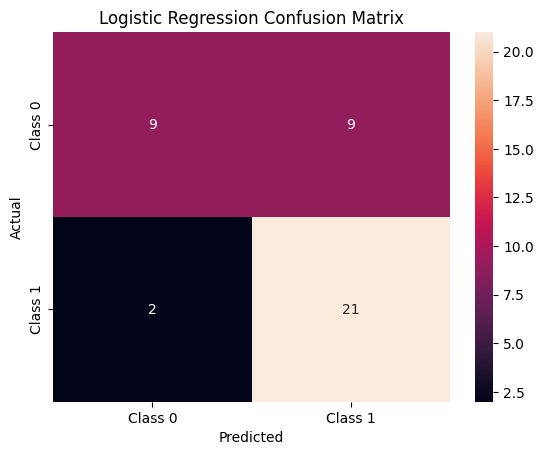

In [36]:
# Initialize model
logreg = CustomLogisticRegression()

# Train model
logreg.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg.predict(X_test)

# Check accuracy of predictions
logreg_accuracy = accuracy_score(y_test, logreg_preds)

# Print the accuracy for each model
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")

# Evaluation - Directly using the evaluate method for model
logreg.evaluate(y_test, logreg_preds, class_names=["Class 0", "Class 1"])



### Accuracy Results:
  At **0.73**, the model correctly identified the income category (low or high) 73% of the time.  This is a generic measure of the model's performance, suggesting that the model correctly predicted 30 out of 41 total cases.


 ### Confusion Matrix Explanation:
  This matrix provides a detailed breakdown of the model's predictions.  True Negatives (9) represent successfully anticipated low-income (Class 0) situations.  False Positives (9) are instances in which the model predicted a high income (Class 1) when it was actually low.  False Negatives (2) are occasions in which the model anticipated low income (Class 0) rather than high income (Class 1).  True Positives (21) are examples of great income that were forecast accurately.

### Implications for the ML Task:
The model excels at predicting high income (Class 1) with 91% recall, but struggles with low income (Class 0), with just 50% recall.  The accuracy of 73% indicates good overall performance, although the model misses many low-income cases.  This shows that more progress can be made, particularly in Class 0 prediction.


## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a basic machine learning technique used in classification and regression.  It predicts the class of a new data point based on the 'k' closest points in the training dataset.  The forecast is determined by the predominant class of these neighbors.  KNN is non-parametric, which means it does not make assumptions about the underlying data distribution.

This code initializes a custom KNN classifier, trains it using the training data (X_train, y_train), and then uses it to predict the income group for the test data (X_test). It calculates the prediction accuracy by comparing the predictions (knn_preds) with the actual labels (y_test). Finally, it prints the accuracy and calls the evaluate method to display detailed performance metrics like precision, recall, and F1-score for both income classes.

KNN Classifier Accuracy: 0.6585

KNN Classifier Report
              precision    recall  f1-score   support

     Class 0       0.70      0.39      0.50        18
     Class 1       0.65      0.87      0.74        23

    accuracy                           0.66        41
   macro avg       0.67      0.63      0.62        41
weighted avg       0.67      0.66      0.64        41



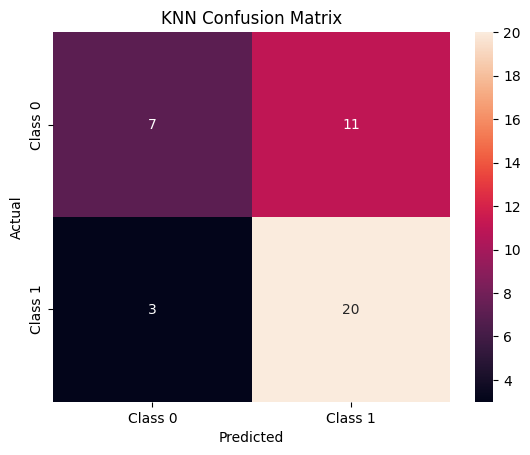

In [37]:
# Initialize model
knn = CustomKNNClassifier()

# Train model
knn.fit(X_train, y_train)

# Make predictions
knn_preds = knn.predict(X_test)

# Check accuracy of predictions
knn_accuracy = accuracy_score(y_test, knn_preds)

# Print the accuracy for each model
print(f"KNN Classifier Accuracy: {knn_accuracy:.4f}")

# Evaluation - Directly using the evaluate method for model
knn.evaluate(y_test, knn_preds, class_names=["Class 0", "Class 1"])





### Accuracy Results:
The accuracy of 0.6585 indicates that the KNN model accurately identified the income group almost 66% of the time.  Out of 41 predictions, it got 27 correct and 14 incorrect.  This offers us a sense of the model's overall performance.

### Confusion Matrix:
 The confusion matrix explains how the model predicts results.  True Negatives (7) are low-income (Class 0) cases that were correctly predicted.  False Positives (11) are low-income cases that are wrongly classified as high-income.  False Negatives (3) are occasions where high income is incorrectly predicted as low income.  True Positives (20) are high-income cases that were accurately anticipated.

### Implications for the ML Task:
The KNN model accurately identifies high-income persons (Class 1), with a recall of 87%.  However, it performs poorly with low-income forecasts (Class 0), catching only 39% of them.  The accuracy (66%) is acceptable but somewhat lower than that of the logistic regression model, and the primary issue is the absence of numerous low-income predictions.  This shows that KNN may not be the ideal option if Class 0 is particularly crucial in our task.


## Random Forest

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their outputs to make a final prediction. Each tree is trained on a random subset of the data and features, which helps reduce overfitting and improves overall accuracy. It's powerful, works well with both classification and regression tasks, and is known for its high performance even with minimal tuning.

This code creates a custom Random Forest classifier, trains it on the training data (X_train, y_train), and then applies the model to predict income group labels on the test data (X_test).  It determines the model's accuracy by comparing predicted values (rf_preds) to actual test labels (y_test).  The accuracy is printed, and the evaluate technique is used to show detailed performance metrics such as precision, recall, and F1-score for both income groups.


Random Forest Accuracy: 0.8537

Random Forest Classifier Report
              precision    recall  f1-score   support

     Class 0       0.93      0.72      0.81        18
     Class 1       0.81      0.96      0.88        23

    accuracy                           0.85        41
   macro avg       0.87      0.84      0.85        41
weighted avg       0.86      0.85      0.85        41



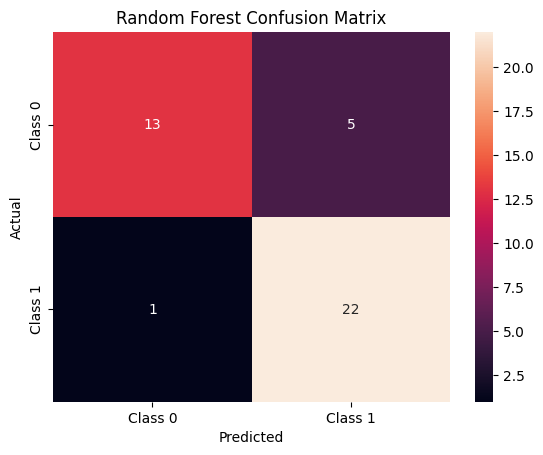

In [38]:
# Initialize model
rf = CustomRandomForestClassifier()

# Train model
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Check accuracy of predictions
rf_accuracy = accuracy_score(y_test, rf_preds)

# Print the accuracy for each model
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Evaluation - Directly using the evaluate method for model
rf.evaluate(y_test, rf_preds, class_names=["Class 0", "Class 1"])



### Accuracy Results:
The Random Forest model correctly identified the income group 85% of the time (accuracy = 0.8537).  Out of 41 predictions, 35 were correct and only six were incorrect.  This demonstrates great overall model performance.

### Confusion Matrix:
 The confusion matrix is a breakdown of prediction results.  True Positives (13) are low-income (Class 0) cases that were successfully anticipated.  False Positives (1) are occasions where high income is incorrectly anticipated as low income.  False Negatives (5) are low-income cases misclassified as high-income.  True Negatives (22) are situations of high income (Class 1) that were correctly anticipated.

### Implications for the ML Task:
  The Random Forest model is effective for both classes.  It has a high recall (96%) for high-income forecasts (Class 1) while enhancing memory for low-income (Class 0) predictions by 72%.  With the best accuracy (85%) of any model examined, Random Forest appears to be the most balanced and dependable solution for this income group categorization assignment.



##  Conclusion

- We created a custom ML package containing Logistic Regression, KNN, and Random Forest classifiers.
- We used WBGAPI to retrieve real-world data from the World Bank.
- Our package accurately classified countries by infant mortality based on socio-economic indicators.
- Among all models tested, **Random Forest** performed the best with the highest accuracy (85%) and strong balance between both income classes. **Logistic Regression** was decent (73%) but struggled with low-income recall, while **KNN** had the lowest accuracy (66%) and also missed many low-income cases. Overall, **Random Forest is the most reliable model for this task.**

This notebook fulfills the requirement of demonstrating practical use of the package.